###Importing the libraries

In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

###Uploading the dataset

In [2]:
from google.colab import files
files.upload()

Saving lung cancer dataset.zip to lung cancer dataset.zip


###Extracting the dataset

In [4]:
from zipfile import ZipFile
with ZipFile('lung cancer dataset.zip', 'r') as zip:
  zip.extractall()

###Creating image augmentation and splitting validation

In [65]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.4,
    zoom_range=0.2,
    shear_range=0.1,
    horizontal_flip=True
)


###Preprocessing the training set

In [66]:
training_set = datagen.flow_from_directory(
    '/content/lung cancer dataset',
    target_size=(64,64),
    batch_size=32,
    class_mode="categorical",
    subset="training",
)
print(training_set.class_indices)

Found 923 images belonging to 5 classes.
{'Benign cases': 0, 'Normal cases': 1, 'adenocarcinoma': 2, 'large cell carcinoma': 3, 'squamous cell carcinoma': 4}


###Preprocessing the test set

In [67]:
val_set = datagen.flow_from_directory(
    "/content/lung cancer dataset",
    target_size=(64,64),
    batch_size=32,
    class_mode="categorical",
    subset="validation",
    shuffle=False,
    seed=42
)
test_set = val_set
print(val_set.class_indices)

Found 612 images belonging to 5 classes.
{'Benign cases': 0, 'Normal cases': 1, 'adenocarcinoma': 2, 'large cell carcinoma': 3, 'squamous cell carcinoma': 4}


###Building CNN

In [68]:
cnn = tf.keras.models.Sequential()

In [69]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape = [64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [70]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [71]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [72]:
cnn.add(tf.keras.layers.Flatten())

In [73]:
cnn.add(tf.keras.layers.Dense(units=120, activation='relu'))

In [74]:
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

In [75]:
cnn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 120)            │       276,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 5)              │           605 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,853 (1.35 MB)

 Trainable params: 352,853 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

###Training CNN

In [76]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [77]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 349ms/step - accuracy: 0.3904 - loss: 1.3442 - val_accuracy: 0.5245 - val_loss: 1.0956
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 344ms/step - accuracy: 0.5502 - loss: 0.9778 - val_accuracy: 0.5458 - val_loss: 0.9746
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 431ms/step - accuracy: 0.6488 - loss: 0.7709 - val_accuracy: 0.5997 - val_loss: 0.8572
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 431ms/step - accuracy: 0.6712 - loss: 0.7135 - val_accuracy: 0.6405 - val_loss: 0.8848
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 431ms/step - accuracy: 0.6852 - loss: 0.6670 - val_accuracy: 0.6765 - val_loss: 0.8747
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 328ms/step - accuracy: 0.7352 - loss: 0.6140 - val_accuracy: 0.6634 - val_loss: 0.8774
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 368ms/step - accuracy: 0.7180 - loss: 0.6242 - val_accuracy: 0.6716 - val_loss: 0.9563
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 341ms/step - accuracy: 0.7773 - loss: 0.5232 - val_accu

###Prediction

In [78]:
y_pred = cnn.predict(test_set)

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step


###Confusion matrix

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step


<Axes: >

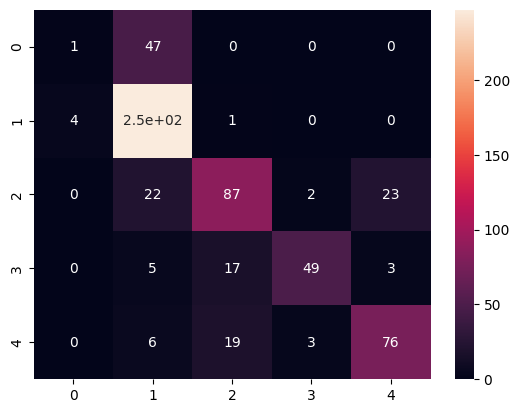

In [80]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

y_true = test_set.classes

y_pred_probabilities = cnn.predict(test_set)
y_pred = np.argmax(y_pred_probabilities, axis=1)

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot = True)

###Classification report

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.02      0.04        48
           1       0.76      0.98      0.85       252
           2       0.70      0.65      0.67       134
           3       0.91      0.66      0.77        74
           4       0.75      0.73      0.74       104

    accuracy                           0.75       612
   macro avg       0.66      0.61      0.61       612
weighted avg       0.72      0.75      0.72       612



###Accuracy

In [83]:
from sklearn.metrics import accuracy_score
accuracy = round(accuracy_score(y_true, y_pred), 2) * 100
print(f"The Accuracy of the model is: {accuracy}%")

The Accuracy of the model is: 75.0%


#LUNG CANCER CLASSIFICATION

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
The predicted cancer type is: adenocarcinoma


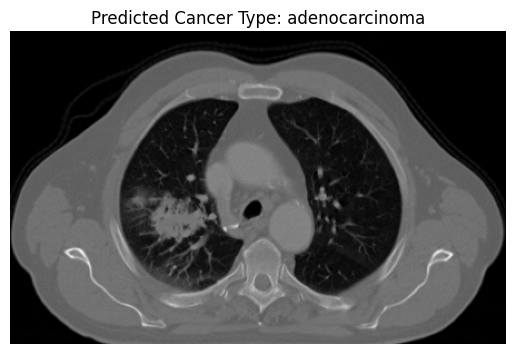

In [95]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

class_names = {
    0: 'Benign cases',
    1: 'Normal cases',
    2: 'adenocarcinoma',
    3: 'large cell carcinoma',
    4: 'squamous cell carcinoma'
}

# Load image
img_path = "/content/adenocarcino_lung.png"
new_image = image.load_img(img_path, target_size=(64,64))

# Convert for model
img_array = image.img_to_array(new_image)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Predict
result = cnn.predict(img_array)

# Get class index
pred_idx = np.argmax(result[0])

predicted_class = class_names[pred_idx]

print(f"The predicted cancer type is: {predicted_class}")

# Display image
plt.imshow(image.load_img(img_path))
plt.title(f"Predicted Cancer Type: {predicted_class}")
plt.axis('off')
plt.show()
